# K-Mean clustering

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

In [108]:
class kMeans:
    def __init__(self, n_classes):
        self.k = n_classes
        
    def fit(self, X, maxIter=100):
        self.mean = np.random.randn(self.k, X.shape[1])
        assignment = np.zeros(X.shape[0])
        new_assignment = self.assign(X)
        if len(np.unique(new_assignment)) < self.k:
            return self.fit(X)
        n_iter = 1
        while n_iter <= maxIter and (new_assignment != assignment).any():
            self.mean = np.array([np.mean(X[new_assignment == i], axis=0) for i in range(self.k)])
            assignment = new_assignment
            new_assignment = self.assign(X)
        return new_assignment
    
    def assign(self, X):
        distance = cdist(X, self.mean, metric='euclidean')
        assignment = np.argmin(distance, axis=-1)
        return assignment

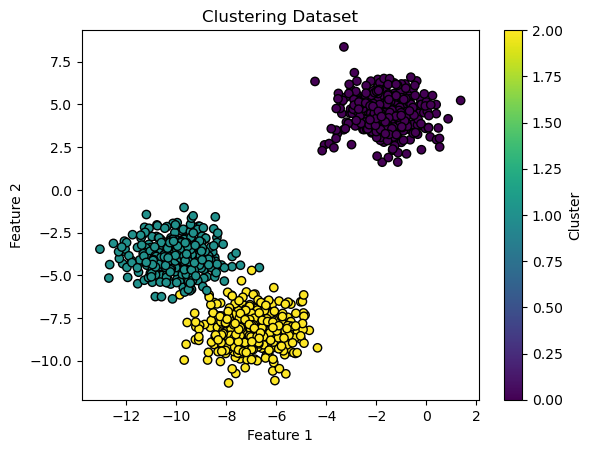

In [109]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.colorbar(label='Cluster')
plt.show()

In [110]:
kmean = kMeans(3)
classes = kmean.fit(X)

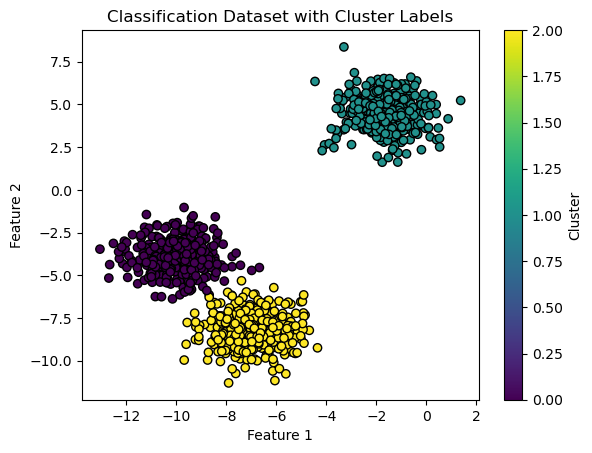

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()